# Domain Specific Dataset Analysis
1. [Import Libraries](#Import-Libraries)
2. [Download Datasets](#Download-Datasets)
3. [Clean Datasets](#Clean-Datasets)
4. [Tokenisation and Stemming](#Tokenisation-and-Stemming)
5. [Sentence Segmentation](#Sentence-Segmentation)
6. [POS Tagging](#POS-Tagging)

## Import Libraries
[Back to Top](#Domain-Specific-Dataset-Analysis)
- bs4
- nltk
- pdfminer
- pandas
- numpy
- matplotlib
- seaborn

In [1]:
# Pip install
import sys
!{sys.executable} -m pip install requests beautifulsoup4 nltk numpy pdfminer.six seaborn

You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
# Import Libraries
import requests
import re
import random
import os
import json
import unicodedata
from io import StringIO
from urllib.request import urlretrieve
from collections import defaultdict

from bs4 import BeautifulSoup
import nltk

import pdfminer
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("paper", rc={
    "font.size": 20,
    "axes.titlesize": 20,
    "axes.labelsize": 20,
})
font_size = 20

In [3]:
# Import NLTK Packages
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tiffanyleong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tiffanyleong/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/tiffanyleong/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## Download Datasets
[Back to Top](#Domain-Specific-Dataset-Analysis)
- Stack Overflow questions and answers about ReactJS
- Research papers about peer tutoring
- Patents about drugs

In [4]:
def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, laparams=laparams, codec="utf-8")
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos = set()

    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,caching=caching, check_extractable=True):
        interpreter.process_page(page)

    text = retstr.getvalue()

    fp.close()
    device.close()
    retstr.close()
    text = unicodedata.normalize("NFKD", text)
    return text

### Stack Overflow

In [5]:
# Fetch Data
url = "https://api.stackexchange.com/2.2/tags/reactjs/faq?site=stackoverflow"
resp = requests.get(url=url)
data = resp.json()

In [6]:
# Parse Questions
def parse_questions(data):
    items = data["items"]
    stack_overflow = []

    for item in items[:20]:
        link = item["link"]
        page = requests.get(link)
        soup = BeautifulSoup(page.content, 'html.parser')
        text = soup.get_text()
        
        divs = soup.findAll("div", {"class": "s-prose js-post-body"})
        div_text = []
        for div in divs:
            div_text.append(div.get_text())
        
        print(link)
        stack_overflow.append(" ".join(div_text))
        
    return stack_overflow

stack_overflow = parse_questions(data)

https://stackoverflow.com/questions/54069253/usestate-set-method-not-reflecting-change-immediately
https://stackoverflow.com/questions/30782948/why-calling-react-setstate-method-doesnt-mutate-the-state-immediately
https://stackoverflow.com/questions/31079081/programmatically-navigate-using-react-router
https://stackoverflow.com/questions/27928372/react-router-urls-dont-work-when-refreshing-or-writing-manually
https://stackoverflow.com/questions/41278385/setstate-doesnt-update-the-state-immediately
https://stackoverflow.com/questions/29577977/unable-to-access-react-instance-this-inside-event-handler
https://stackoverflow.com/questions/28329382/understanding-unique-keys-for-array-children-in-react-js
https://stackoverflow.com/questions/43040721/how-to-update-nested-state-properties-in-react
https://stackoverflow.com/questions/26253351/correct-modification-of-state-arrays-in-reactjs
https://stackoverflow.com/questions/38394015/how-to-pass-data-from-child-component-to-its-parent-in-reactjs

In [7]:
# Store stack overflow questions
with open("stack_overflow/text.json", "w") as f:
    json.dump(stack_overflow, f)

In [8]:
# Load stack overflow questions
with open("stack_overflow/text.json", "r") as f:
    stack_overflow = json.load(f)

### Research Papers

In [9]:
# Extract text from pdfs
research_papers_path = "research_papers/data/"
research_papers = []

for f in os.listdir(research_papers_path):
    filename, ext = os.path.splitext(f)

    if ext == ".pdf":
        print(filename)
        text = convert_pdf_to_txt(research_papers_path + f)
        research_papers.append("".join(text))

Classwide Peer Tutoring
Implementation integrity in
Nudging study habits
Effects of Peer Tutoring
Examining the effects
Promoting university
Blending asynchronous discussion
Comparing Whole Word
REMEDIAL EDUCATION
Learning partnership
Evidence based practice
Primary prevention
The impact of a peer
Paradoxical effects of feedback
Peer Tutoring with First
CROSSAGE PEER TUTORING
Heterogeneous effects of peer tutoring
Peer‐tutoring
Epistemics and Expertise
Baccalaureate nursing students


In [10]:
# Store research papers
with open("research_papers/text.json", "w") as f:
    json.dump(research_papers, f)

In [11]:
# Load research papers
with open("research_papers/text.json", "r") as f:
    research_papers = json.load(f)

### Patents

In [12]:
# List of sources from Google Patents
patent_sources = [
    "https://patentimages.storage.googleapis.com/ac/97/e2/8d2e454741284c/US8574188.pdf",
    "https://patentimages.storage.googleapis.com/46/10/75/2469965e11b7a5/US8679093.pdf",
    "https://patentimages.storage.googleapis.com/f5/7c/59/be8fe1286853d3/US8865211.pdf",
    "https://patentimages.storage.googleapis.com/a9/b7/ce/ffac0ac55334ed/US8968767.pdf",
    "https://patentimages.storage.googleapis.com/23/35/2c/3d4048f5496708/US8986250.pdf",
    "https://patentimages.storage.googleapis.com/fa/03/76/4955482d5056f9/US9283322.pdf",
    "https://patentimages.storage.googleapis.com/c6/21/41/a60a3b359470fe/US9486414.pdf",
    "https://patentimages.storage.googleapis.com/89/95/d7/51a1dc364be4de/US9566336.pdf",
    "https://patentimages.storage.googleapis.com/9c/9d/3e/39f77342e91e94/US9956178.pdf",
    "https://patentimages.storage.googleapis.com/48/b7/91/588e332422745b/US10188664.pdf",
    "https://patentimages.storage.googleapis.com/cf/c2/47/1ed9a372e36079/US10029080.pdf",
    "https://patentimages.storage.googleapis.com/b8/f5/de/79e747210fbbc2/US10300114.pdf",
    "https://patentimages.storage.googleapis.com/1a/35/04/ee8150723e19bd/US10314891.pdf",
    "https://patentimages.storage.googleapis.com/3d/29/90/5b45e2595827b2/US10335463.pdf",
    "https://patentimages.storage.googleapis.com/8b/9f/70/5a60ce9e714b3f/US10350163.pdf",
    "https://patentimages.storage.googleapis.com/53/4c/1a/f6508d7b542791/US10369274.pdf",
    "https://patentimages.storage.googleapis.com/f4/f2/d6/bfb8d389190626/US10478396.pdf",
    "https://patentimages.storage.googleapis.com/5f/fe/5b/9da1392ad0fbd0/US10507295.pdf", 
    "https://patentimages.storage.googleapis.com/05/f4/b8/3b4a9b0b5a1b6c/USRE46217.pdf",
    "https://patentimages.storage.googleapis.com/01/6c/de/a9abf930a914a6/US20170119854A1.pdf"
]

In [13]:
# Extract text from pdfs
patents = []

for source in patent_sources:
    print(source)
    filename = source.split("/")[-1]
    pdf_url = source
    urlretrieve(pdf_url, f"patents/data/{filename}")
    text = convert_pdf_to_txt(f"patents/data/{filename}")
    patents.append("".join(text))

https://patentimages.storage.googleapis.com/ac/97/e2/8d2e454741284c/US8574188.pdf
https://patentimages.storage.googleapis.com/46/10/75/2469965e11b7a5/US8679093.pdf
https://patentimages.storage.googleapis.com/f5/7c/59/be8fe1286853d3/US8865211.pdf
https://patentimages.storage.googleapis.com/a9/b7/ce/ffac0ac55334ed/US8968767.pdf
https://patentimages.storage.googleapis.com/23/35/2c/3d4048f5496708/US8986250.pdf
https://patentimages.storage.googleapis.com/fa/03/76/4955482d5056f9/US9283322.pdf
https://patentimages.storage.googleapis.com/c6/21/41/a60a3b359470fe/US9486414.pdf
https://patentimages.storage.googleapis.com/89/95/d7/51a1dc364be4de/US9566336.pdf
https://patentimages.storage.googleapis.com/9c/9d/3e/39f77342e91e94/US9956178.pdf
https://patentimages.storage.googleapis.com/48/b7/91/588e332422745b/US10188664.pdf
https://patentimages.storage.googleapis.com/cf/c2/47/1ed9a372e36079/US10029080.pdf
https://patentimages.storage.googleapis.com/b8/f5/de/79e747210fbbc2/US10300114.pdf
https://paten

In [14]:
# Store patents
with open("patents/text.json", "w") as f:
    json.dump(patents, f)

In [15]:
# Load research papers
with open("patents/text.json", "r") as f:
    patents = json.load(f)

## Clean Datasets
[Back to Top](#Domain-Specific-Dataset-Analysis)

### Stack Overflow

In [16]:
# Clean text
cleaned_stack_overflow = []
for text in stack_overflow:
    text = re.sub(r"[\n\s]+", " ", text)
    cleaned_stack_overflow.append(text.strip())

In [17]:
# Store cleaned text
with open("stack_overflow/cleaned_text.json", "w") as f:
    json.dump(cleaned_stack_overflow, f)

### Research Papers

In [18]:
# Clean text
cleaned_research_papers = [] 
for text in research_papers:
    text = re.sub(r"[\n\s]+", " ", text)
    text = re.sub(r"([…\.])\1{3,}", "", text)
    cleaned_research_papers.append(text.strip())

In [19]:
# Store cleaned text
with open("research_papers/cleaned_text.json", "w") as f:
    json.dump(cleaned_research_papers, f)

### Patents

In [20]:
# Clean text
cleaned_patents = []
for text in patents:
    text = re.sub(r"\n", " ", text)
    text = re.sub(r"\b\w*([a-zA-Z\-])\1{3,}\w*\b", "", text)
    text = re.sub(r"\b\w*(([a-zA-Z\-])[a-zA-Z\-]+)\w*\1\w*\1\w*\1\w*\b", "", text)
    text = re.sub(r"\b\w*(([a-zA-Z\-])\2)\w*\1\w*\1\w*\b", "", text)
    text = re.sub(r"(\.)\1{3,}", "", text)
    cleaned_patents.append(text.strip())

In [21]:
# Store cleaned text
with open("patents/cleaned_text.json", "w") as f:
    json.dump(cleaned_patents, f)

## Tokenisation and Stemming
[Back to Top](#Domain-Specific-Dataset-Analysis)

In [22]:
def identify_tokens(text_arr):
    tokens = []
    for text in text_arr:
        tokens.extend(nltk.word_tokenize(text.lower()))
    return tokens

def perform_stemming(tokens):
    stemmer = nltk.stem.PorterStemmer()
    stems = [stemmer.stem(token) for token in tokens]
    return stems

In [23]:
domain_tokens = dict()
domain_stems = dict()
distinct_tokens_count = dict()
distinct_stems_count = dict()

def add_to_dict(domain_name, tokens, stems):
    domain_tokens[domain_name] = tokens
    domain_stems[domain_name] = stems
    distinct_tokens_count[domain_name] = len(list(set(tokens)))
    distinct_stems_count[domain_name] = len(list(set(stems)))

### Stack Overflow

In [24]:
# Perform tokenisation & stemming
tokens = identify_tokens(cleaned_stack_overflow)
stems = perform_stemming(tokens)

add_to_dict("Stack Overflow", tokens, stems)

In [25]:
# Store tokens and stems
with open("stack_overflow/tokens.json", "w") as f:
    json.dump(tokens, f)

with open("stack_overflow/stems.json", "w") as f:
    json.dump(stems, f)

In [26]:
# Create DataFrames
tokens_df = pd.DataFrame(pd.Series(list(set(tokens))).apply(lambda x:len(x)), columns=["Token Length"])
tokens_df.sort_values(by="Token Length", inplace=True)
tokens_df.to_csv("stack_overflow/tokens.csv")

stems_df = pd.DataFrame(pd.Series(list(set(stems))).apply(lambda x:len(x)), columns=["Stem Length"])
stems_df.sort_values(by="Stem Length", inplace=True)
stems_df.to_csv("stack_overflow/stems.csv")

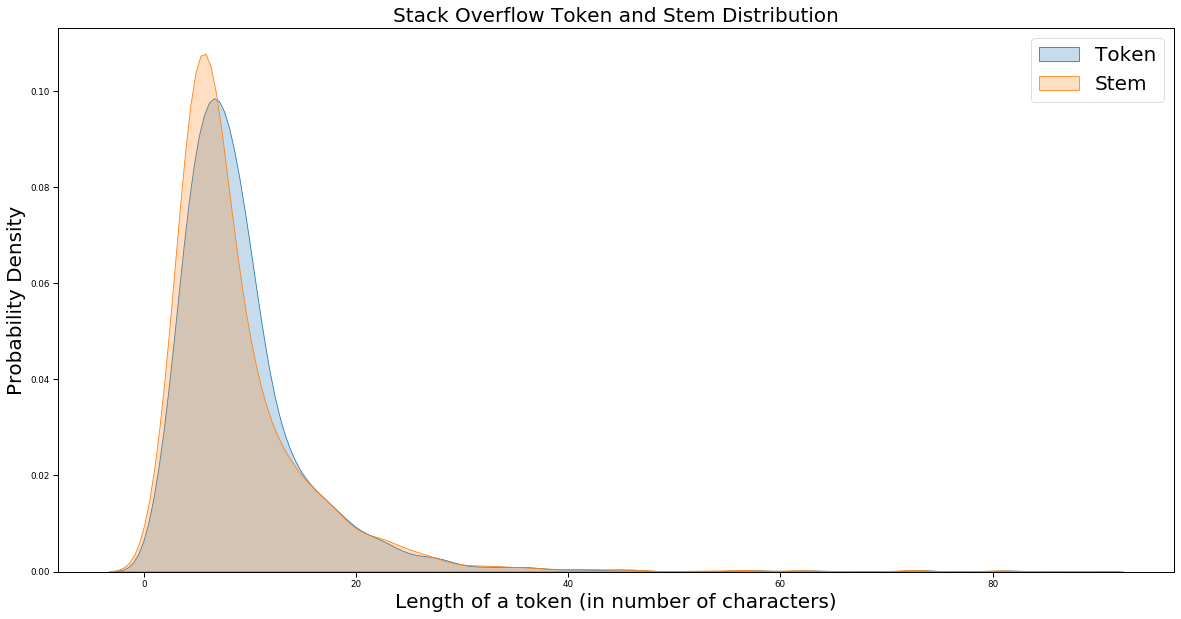

In [27]:
# Plot distribution
plt.figure(figsize=(20, 10))
ax = sns.kdeplot(tokens_df["Token Length"], shade=True, label="Token")
ax = sns.kdeplot(stems_df["Stem Length"], shade=True, label="Stem")
plt.legend(fontsize=font_size)
plt.xlabel("Length of a token (in number of characters)",  fontsize=font_size) 
plt.ylabel("Probability Density", fontsize=font_size)
plt.title("Stack Overflow Token and Stem Distribution", fontsize=font_size)
plt.savefig("stack_overflow/token_stem_distribution.png")

### Research Papers

In [28]:
# Perform tokenisation & stemming
tokens = identify_tokens(cleaned_research_papers)
stems = perform_stemming(tokens)

add_to_dict("Research Papers", tokens, stems)

In [29]:
# Store tokens and stems
with open("research_papers/tokens.json", "w") as f:
    json.dump(tokens, f)

with open("research_papers/stems.json", "w") as f:
    json.dump(stems, f)

In [30]:
# Create DataFrames
tokens_df = pd.DataFrame(pd.Series(list(set(tokens))).apply(lambda x:len(x)), columns=["Token Length"])
tokens_df.sort_values(by="Token Length", inplace=True)
tokens_df.to_csv("research_papers/tokens.csv")

stems_df = pd.DataFrame(pd.Series(list(set(stems))).apply(lambda x:len(x)), columns=["Stem Length"])
stems_df.sort_values(by="Stem Length", inplace=True)
stems_df.to_csv("research_papers/stems.csv")

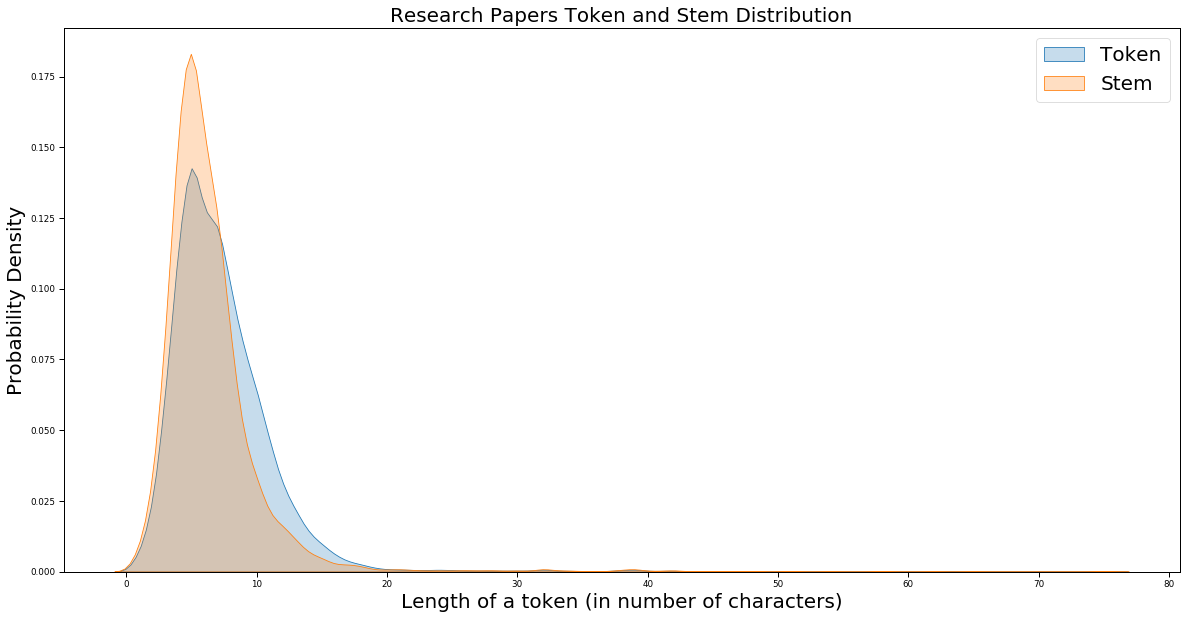

In [31]:
# Plot distribution
plt.figure(figsize=(20, 10))
ax = sns.kdeplot(tokens_df["Token Length"], shade=True, label="Token")
ax = sns.kdeplot(stems_df["Stem Length"], shade=True, label="Stem")
plt.legend(fontsize=font_size)
plt.xlabel("Length of a token (in number of characters)",  fontsize=font_size) 
plt.ylabel("Probability Density", fontsize=font_size)
plt.title("Research Papers Token and Stem Distribution", fontsize=font_size)
plt.savefig("research_papers/token_stem_distribution.png")

### Patents

In [32]:
# Perform tokenisation & stemming
tokens = identify_tokens(cleaned_patents)
stems = perform_stemming(tokens)

add_to_dict("Patents", tokens, stems)

In [33]:
# Store tokens and stems
with open("patents/tokens.json", "w") as f:
    json.dump(tokens, f)

with open("patents/stems.json", "w") as f:
    json.dump(stems, f)

In [34]:
# Create DataFrames
tokens_df = pd.DataFrame(pd.Series(list(set(tokens))).apply(lambda x:len(x)), columns=["Token Length"])
tokens_df.sort_values(by="Token Length", inplace=True)
tokens_df.to_csv("patents/tokens.csv")

stems_df = pd.DataFrame(pd.Series(list(set(stems))).apply(lambda x:len(x)), columns=["Stem Length"])
stems_df.sort_values(by="Stem Length", inplace=True)
stems_df.to_csv("patents/stems.csv")

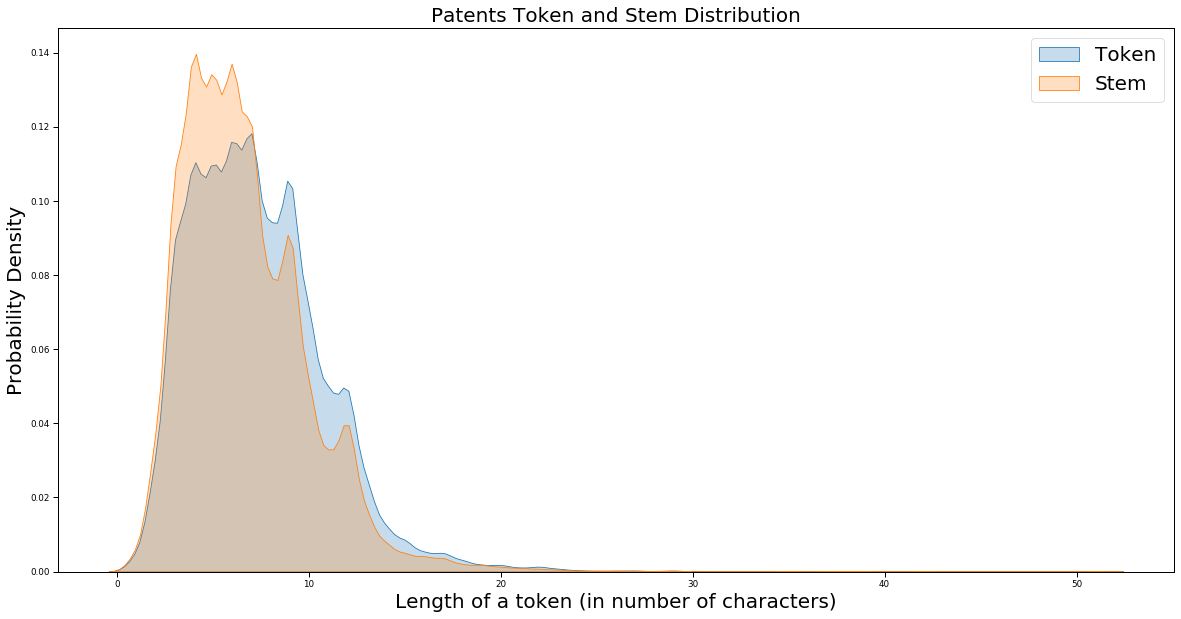

In [35]:
# Plot distribution
plt.figure(figsize=(20, 10))
ax = sns.kdeplot(tokens_df["Token Length"], shade=True, label="Token")
ax = sns.kdeplot(stems_df["Stem Length"], shade=True, label="Stem")
plt.legend(fontsize=font_size)
plt.xlabel("Length of a token (in number of characters)",  fontsize=font_size) 
plt.ylabel("Probability Density", fontsize=font_size)
plt.title("Patents Token and Stem Distribution", fontsize=font_size)
plt.savefig("patents/token_stem_distribution.png")

### Comparison of Number of Distinct Tokens and Stems

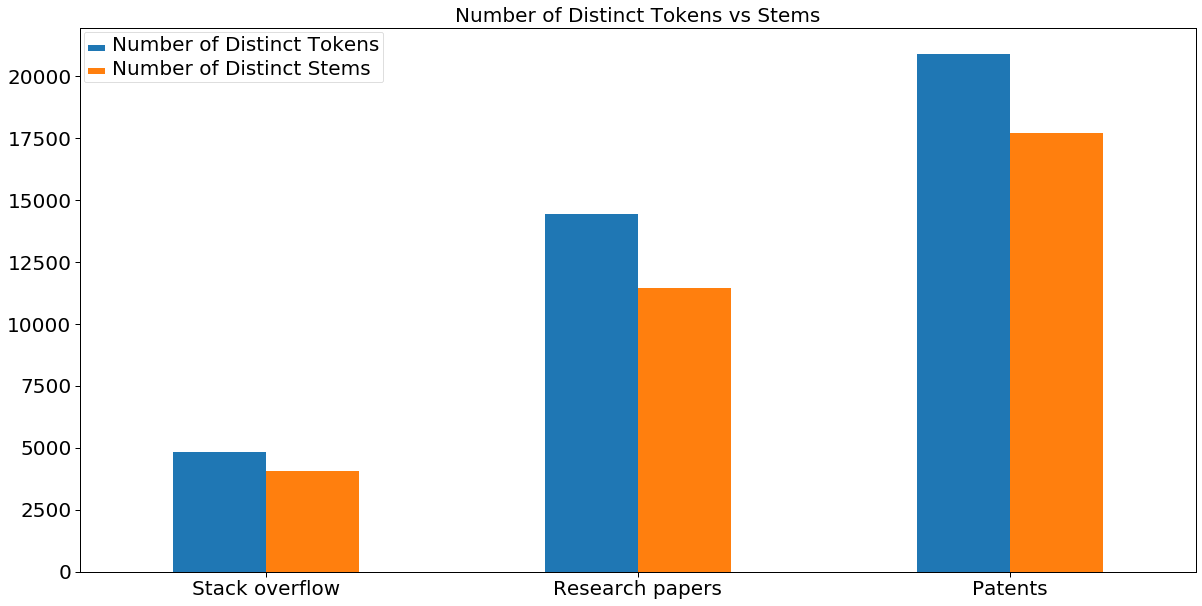

In [36]:
index = [name.capitalize() for name in distinct_tokens_count.keys()]
df = pd.DataFrame({
    "Number of Distinct Tokens": [v for v in distinct_tokens_count.values()], 
    "Number of Distinct Stems": [v for v in distinct_stems_count.values()]
}, index=index)
ax = df.plot.bar(rot=0, figsize=(20, 10),  fontsize=font_size)
plt.setp(ax.get_legend().get_texts(), fontsize=font_size)
plt.title("Number of Distinct Tokens vs Stems", fontsize=font_size)
plt.savefig("between_domains/distinct_token_stem.png")

In [37]:
# Percentage decrease in tokens
1 - np.array(list(distinct_stems_count.values())) / np.array(list(distinct_tokens_count.values()))

array([0.16308392, 0.20584771, 0.15238095])

## Sentence Segmentation
[Back to Top](#Domain-Specific-Dataset-Analysis)

In [38]:
def perform_sentence_segmentation(text_arr):
    sentences = []
    for text in text_arr:
        sentences.extend(nltk.sent_tokenize(text))
    return sentences

In [39]:
def get_sentence_lengths(sentences):
    sentence_length_list = []
    for sentence in sentences:
        tokens = nltk.word_tokenize(sentence.lower())
        if len(tokens) > 1000:
            raise Exception("Sentence longer than 10000 tokens")

        sentence_length_list.append(len(tokens))
        
    return sentence_length_list

### Stack Overflow

In [40]:
# Perform sentence segmentation
sentences = perform_sentence_segmentation(cleaned_stack_overflow)
sentence_lengths = get_sentence_lengths(sentences)
stack_overflow_length_df = pd.DataFrame(sentence_lengths).rename(columns={0:'# tokens'})
stack_overflow_length_df["domain"] = "Stack Overflow"

In [41]:
# Store sentences
with open("stack_overflow/sentences.json", "w") as f:
    json.dump(sentences, f)

### Research Papers

In [42]:
# Perform sentence segmentation
sentences = perform_sentence_segmentation(cleaned_research_papers)
sentence_lengths = get_sentence_lengths(sentences)
research_papers_length_df = pd.DataFrame(sentence_lengths).rename(columns={0:'# tokens'})
research_papers_length_df["domain"] = "Research Papers"

In [43]:
# Store sentences
with open("research_papers/sentences.json", "w") as f:
    json.dump(sentences, f)

### Patents

In [44]:
# Perform sentence segmentation
sentences = perform_sentence_segmentation(cleaned_patents)
sentence_lengths = get_sentence_lengths(sentences)
patents_length_df = pd.DataFrame(sentence_lengths).rename(columns={0:'# tokens'})
patents_length_df["domain"] = "Patents"

In [45]:
# Store sentences
with open("patents/sentences.json", "w") as f:
    json.dump(sentences, f)

### Comparison

In [46]:
sentences_df = pd.concat([stack_overflow_length_df, research_papers_length_df, patents_length_df])
sentences_df_count = pd.DataFrame(sentences_df.groupby(['# tokens', 'domain']).size().reset_index(name = "count"))

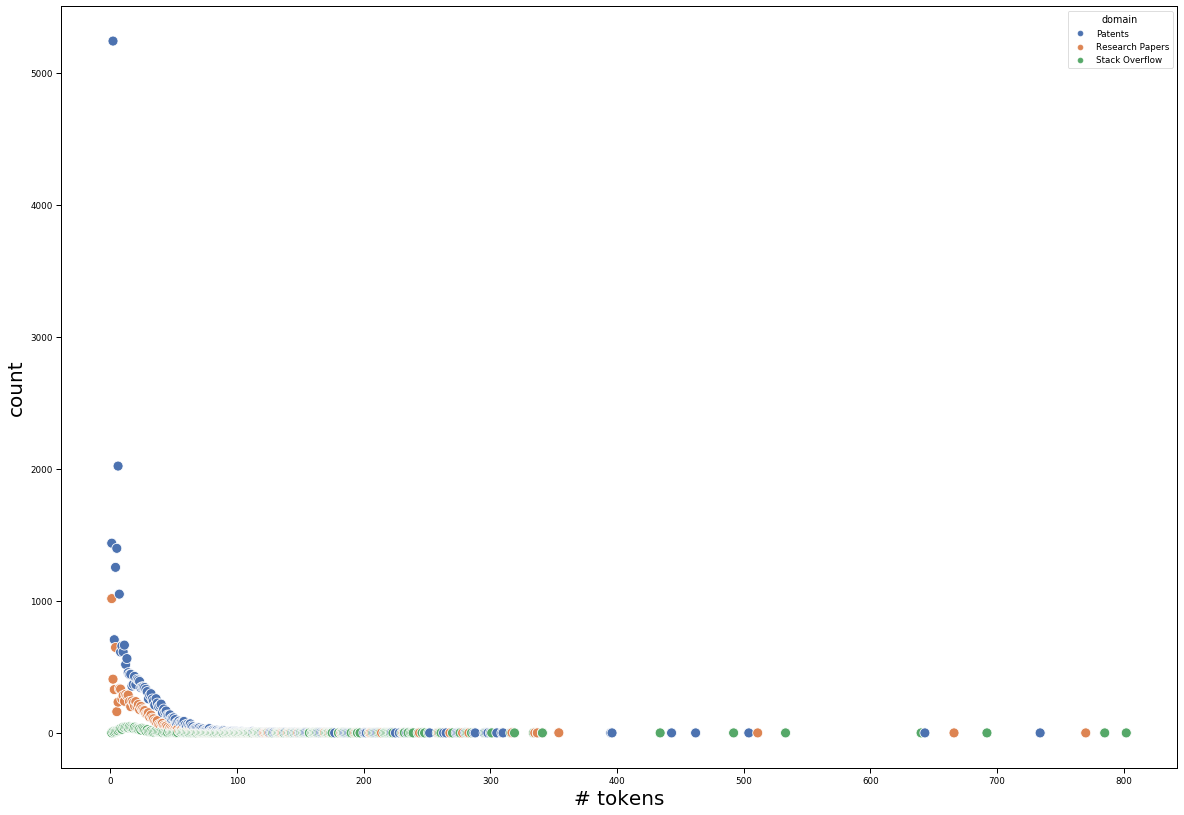

In [47]:
# Plot scatter plot
plt.figure(figsize=(20, 14))
ax = sns.scatterplot(data=sentences_df_count, x="# tokens", y="count", hue="domain", s=100, palette="deep",legend="full")
plt.savefig("between_domains/sentence_length_scatter.png")

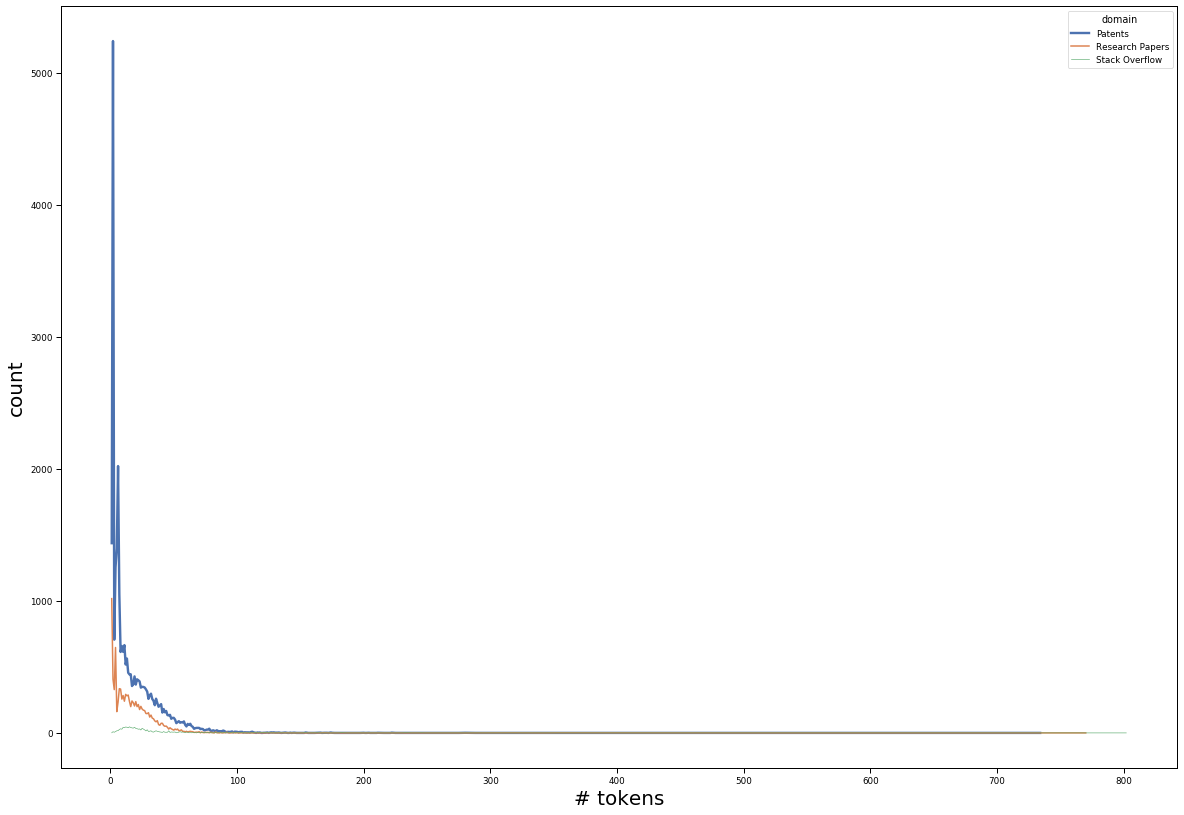

In [48]:
# Plot line plot
plt.figure(figsize=(20, 14))
ax = sns.lineplot(data=sentences_df_count, x="# tokens", y="count", hue="domain", palette="deep", size="domain", legend="full")
plt.savefig("between_domains/sentence_length_lineplot.png")

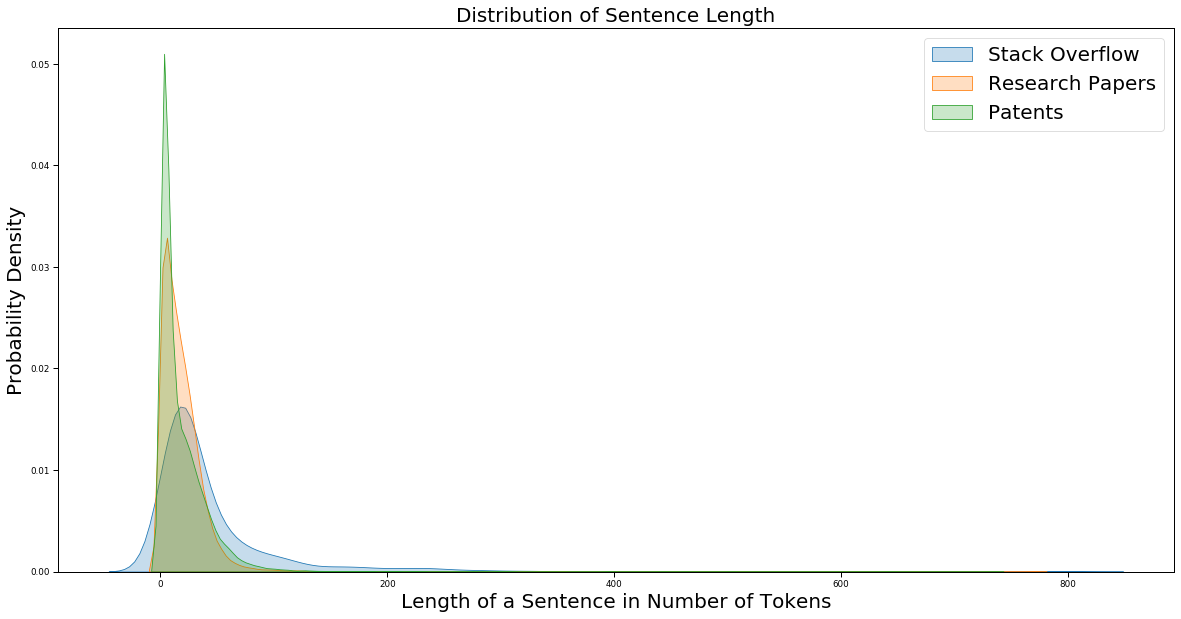

In [49]:
# Plot KDE distribution
plt.figure(figsize=(20, 10))
ax = sns.kdeplot(stack_overflow_length_df["# tokens"], shade=True, label="Stack Overflow")
ax = sns.kdeplot(research_papers_length_df["# tokens"], shade=True, label="Research Papers")
ax = sns.kdeplot(patents_length_df["# tokens"], shade=True, label="Patents")
plt.legend(fontsize=font_size)
plt.xlabel("Length of a Sentence in Number of Tokens",  fontsize=font_size) 
plt.ylabel("Probability Density", fontsize=font_size)
plt.title("Distribution of Sentence Length", fontsize=font_size)
plt.savefig("between_domains/sentence_kde_distribution.png")

In [50]:
sentences_df['log(number of tokens)'] = np.log(sentences_df['# tokens'])

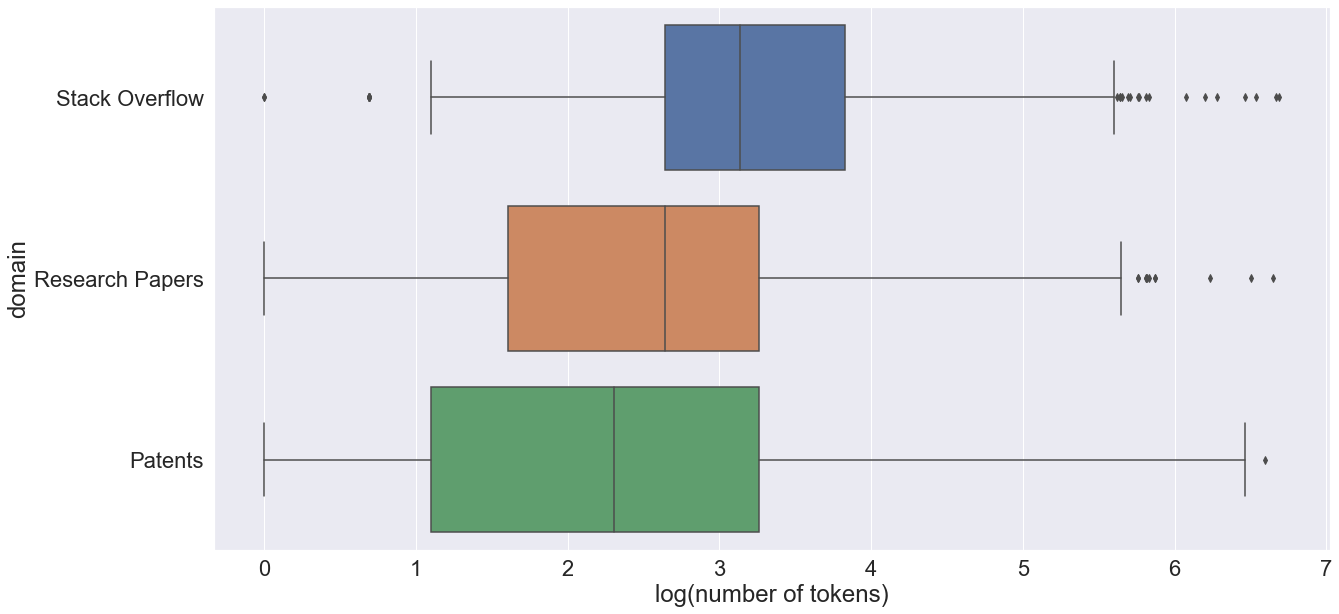

In [51]:
# Plot Log Boxplot
sns.set(font_scale = 2)
plt.figure(figsize=(20, 10))
ax = sns.boxplot(y="domain", x='log(number of tokens)', data=sentences_df)
plt.savefig("between_domains/sentence_log_length_boxplot.png")

## POS Tagging
[Back to Top](#Domain-Specific-Dataset-Analysis)

In [52]:
def pos_tag_sentences(sentences):
    tagged_sentences = []

    for sentence in sentences:
        pos_tags = nltk.pos_tag(nltk.word_tokenize(sentence))
        tagged_sentences.append(" ".join([f"{token}/{pos_tag}" for token, pos_tag in pos_tags]))

    return tagged_sentences

### Stack Overflow
#### Sentences
- Because React is not oriented to work with nested states and all solutions proposed here look as hacks.
- However React.Children.map unlike React.cloneElement changes the keys of the Element appending and extra .$ as the prefix.
- React Router makes the properties and methods of the history instance associated with your router available through the context, under the router object.

In [53]:
# Tag sentences
stack_overflow_sentences_to_tag = [
    "Because React is not oriented to work with nested states and all solutions proposed here look as hacks.",
    "However React.Children.map unlike React.cloneElement changes the keys of the Element appending and extra .$ as the prefix.",
    "React Router makes the properties and methods of the history instance associated with your router available through the context, under the router object.",
]

tagged_stack_overflow_sentences = pos_tag_sentences(stack_overflow_sentences_to_tag)
print("\n\n".join(tagged_stack_overflow_sentences))

Because/IN React/NNP is/VBZ not/RB oriented/VBN to/TO work/VB with/IN nested/JJ states/NNS and/CC all/DT solutions/NNS proposed/VBN here/RB look/VBP as/IN hacks/NNS ./.

However/RB React.Children.map/NNP unlike/IN React.cloneElement/NNP changes/VBZ the/DT keys/NN of/IN the/DT Element/NNP appending/NN and/CC extra/JJ ./. $/$ as/IN the/DT prefix/NN ./.

React/JJ Router/NNP makes/VBZ the/DT properties/NNS and/CC methods/NNS of/IN the/DT history/NN instance/NN associated/VBN with/IN your/PRP$ router/NN available/JJ through/IN the/DT context/NN ,/, under/IN the/DT router/NN object/NN ./.


In [54]:
# Store tagged sentences
with open("stack_overflow/pos_tagging.json", "w") as f:
    json.dump(tagged_stack_overflow_sentences, f)

### Research Papers
#### Sentences
- The second year students were taking a subject ‘‘Maternal and Child Care’’, which included weekly 2-h lectures and 1-h laboratory sessions for one 14-week semester.
- Reading storybooks to kinder- garteners helps them learn new vocabulary words.
- Some students even confided their own experiences to each other or difficulties in dealing with schoolwork, and how they struggled with assignments and demands from the lecturers.

In [55]:
# Tag sentences
research_papers_sentences_to_tag = [
    "The second year students were taking a subject ‘‘Maternal and Child Care’’, which included weekly 2-h lectures and 1-h laboratory sessions for one 14-week semester.",
    "Reading storybooks to kinder- garteners helps them learn new vocabulary words.",
    "Some students even confided their own experiences to each other or difficulties in dealing with schoolwork, and how they struggled with assignments and demands from the lecturers.",
]

tagged_research_papers_sentences = pos_tag_sentences(research_papers_sentences_to_tag)
print("\n\n".join(tagged_research_papers_sentences))

The/DT second/JJ year/NN students/NNS were/VBD taking/VBG a/DT subject/JJ ‘/NN ‘/NNP Maternal/NNP and/CC Child/NNP Care/NNP ’/NNP ’/NNP ,/, which/WDT included/VBD weekly/JJ 2-h/JJ lectures/NNS and/CC 1-h/JJ laboratory/NN sessions/NNS for/IN one/CD 14-week/JJ semester/NN ./.

Reading/VBG storybooks/NNS to/TO kinder-/JJ garteners/NNS helps/VBZ them/PRP learn/VB new/JJ vocabulary/JJ words/NNS ./.

Some/DT students/NNS even/RB confided/VBD their/PRP$ own/JJ experiences/NNS to/TO each/DT other/JJ or/CC difficulties/NNS in/IN dealing/VBG with/IN schoolwork/NN ,/, and/CC how/WRB they/PRP struggled/VBD with/IN assignments/NNS and/CC demands/NNS from/IN the/DT lecturers/NNS ./.


In [56]:
# Store tagged sentences
with open("research_papers/pos_tagging.json", "w") as f:
    json.dump(tagged_research_papers_sentences, f)

### Patents
#### Sentences
- Heterogeneity of autoimmune diseases : pathophysiologic  insights from  genetics and implication  for new  therapies .
- TABLE 5   Target Particle  Formulation 6  (wt %)   10.9  16.5  10.6  43.3  18.7   1OOO   Approximate  Solid Ratio   1.O  1.6  1.O  4.1  1.8   Component   Sodium Citrate  Citric Acid  Methionine  oxyntomodulin  SUCOSE   total   *Sodium Citratefitric Acid formed the citrate buffer for this particle formulation.
- Additional reactants , including  other  combinations of acids and bases which produce an  inert  gas by product are  also  contemplated.

In [57]:
# Tag sentences
patents_sentences_to_tag = [
    "Heterogeneity of autoimmune diseases : pathophysiologic  insights from  genetics and implication  for new  therapies .",
    "TABLE 5   Target Particle  Formulation 6  (wt %)   10.9  16.5  10.6  43.3  18.7   1OOO   Approximate  Solid Ratio   1.O  1.6  1.O  4.1  1.8   Component   Sodium Citrate  Citric Acid  Methionine  oxyntomodulin  SUCOSE   total   *Sodium Citratefitric Acid formed the citrate buffer for this particle formulation.",
    "Additional reactants , including  other  combinations of acids and bases which produce an  inert  gas by product are  also  contemplated ."
]

tagged_patents_sentences = pos_tag_sentences(patents_sentences_to_tag)
print("\n\n".join(tagged_patents_sentences))

Heterogeneity/NN of/IN autoimmune/JJ diseases/NNS :/: pathophysiologic/NN insights/NNS from/IN genetics/NNS and/CC implication/NN for/IN new/JJ therapies/NNS ./.

TABLE/NN 5/CD Target/NNP Particle/NNP Formulation/NNP 6/CD (/( wt/CD %/NN )/) 10.9/CD 16.5/CD 10.6/CD 43.3/CD 18.7/CD 1OOO/CD Approximate/NNP Solid/NNP Ratio/NNP 1.O/CD 1.6/CD 1.O/CD 4.1/CD 1.8/CD Component/NNP Sodium/NNP Citrate/NNP Citric/NNP Acid/NNP Methionine/NNP oxyntomodulin/MD SUCOSE/NNP total/JJ */NNP Sodium/NNP Citratefitric/NNP Acid/NNP formed/VBD the/DT citrate/NN buffer/NN for/IN this/DT particle/NN formulation/NN ./.

Additional/JJ reactants/NNS ,/, including/VBG other/JJ combinations/NNS of/IN acids/NNS and/CC bases/NNS which/WDT produce/VBP an/DT inert/NN gas/NN by/IN product/NN are/VBP also/RB contemplated/VBN ./.


In [58]:
# Store tagged sentences
with open("patents/pos_tagging.json", "w") as f:
    json.dump(tagged_patents_sentences, f)